Лабораторна робота №4

з дисципліни "Обробка даних Python"

---

Виконав:

студент групи КН-221Б

Хайлов Данило Євгенович


---


Прийняв:

асистент кафедри

Звєрцев Г.О.

**Мета:** Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Завдання 1. Робота з набором файлів.**

1) Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.

2) Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
- ім’я файлу;
- кольорову модель;
- формат;
- кількість каналів у зображенні;
- розмір файлу у мегабайтах байтах, округлених до двох знаків після
коми;
- ширину картинки;
- висоту картинки;
- повний шлях до файлу;
- зменшене зображення.

Зауваження:
а) Якщо файл не є зображенням не додавати інформацію про нього в датафрейм.

б) Для обробки набору файлів можете скористатися вбудованими модулями
glob (https://docs.python.org/3/library/glob.html), або zipfile (https://docs.python.org/3/library/zipfile.html)

в) Для відображення картинки в датафреймі можете скористатись методом,
описаним в наступному матеріалі (https://www.kaggle.com/code/stassl/displaying-inline-images-in-pandas-dataframe/notebook)

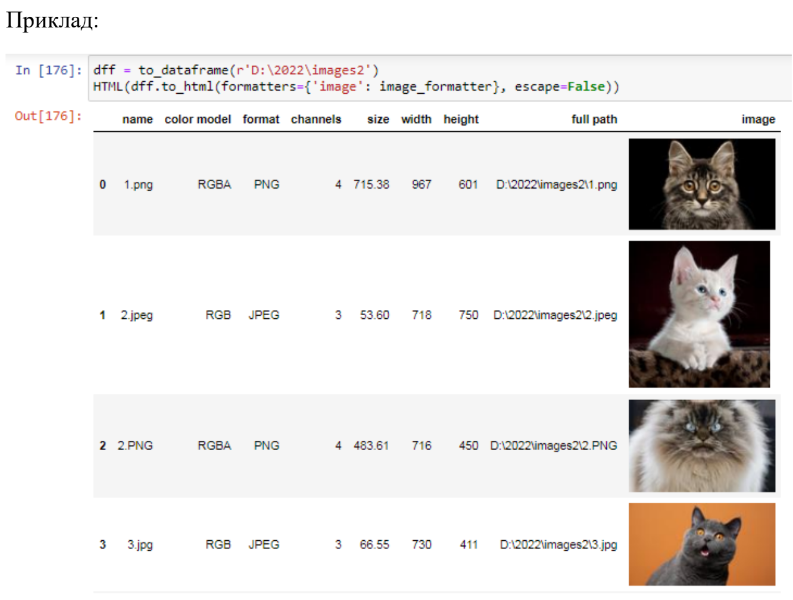

In [2]:
import os
import glob
from PIL import Image
import pandas as pd
from IPython.display import HTML
from io import BytesIO
import base64
import random
import imghdr

In [3]:
file = '/content/drive/MyDrive/Data Analysis Python/files'

In [4]:
def to_dataframe(folder_path):
    image_files = glob.glob(os.path.join(folder_path, "*"))
    df = pd.DataFrame(columns=['name', 'color model', 'format', 'channels', 'size', 'width', 'height', 'full path', 'image'])

    for image_file in image_files:
        try:
            with Image.open(image_file) as img:
                name = os.path.basename(image_file)
                color_model = img.mode
                format = img.format
                channels = len(img.getbands())
                size = round(os.path.getsize(image_file) / (1024 * 1024), 2)
                width, height = img.size
                full_path = os.path.abspath(image_file)
                img.thumbnail((100, 100))
                image = img.copy()

                df = pd.concat([df, pd.DataFrame({'name': [name], 'color model': [color_model], 'format': [format], 'channels': [channels], 'size': [size], 'width': [width], 'height': [height], 'full path': [full_path], 'image': [image]})], ignore_index=True)
        except IOError:
            pass

    return df

In [5]:
df = to_dataframe(file)

In [6]:
def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
      if im.mode == 'RGB':
        im.save(buffer, 'jpeg')
      elif im.mode == 'RGBA':
        im.save(buffer, 'png')
      return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

,name,color model,format,channels,size,width,height,full path,image
0,pic2.jpg,RGB,JPEG,3,0.19,564,848,/content/drive/MyDrive/Data Analysis Python/files/pic2.jpg,
1,pic3.jpg,RGB,JPEG,3,0.08,564,761,/content/drive/MyDrive/Data Analysis Python/files/pic3.jpg,
2,pic4.jpg,RGB,JPEG,3,0.17,564,1002,/content/drive/MyDrive/Data Analysis Python/files/pic4.jpg,
3,pic6.jpg,RGB,JPEG,3,0.12,563,1001,/content/drive/MyDrive/Data Analysis Python/files/pic6.jpg,
4,pic7.jpg,RGB,JPEG,3,0.15,564,843,/content/drive/MyDrive/Data Analysis Python/files/pic7.jpg,
5,pic8.jpg,RGB,JPEG,3,0.06,564,654,/content/drive/MyDrive/Data Analysis Python/files/pic8.jpg,
6,pic9.jpg,RGB,JPEG,3,0.06,564,845,/content/drive/MyDrive/Data Analysis Python/files/pic9.jpg,
7,pic10.jpg,RGB,JPEG,3,0.05,564,804,/content/drive/MyDrive/Data Analysis Python/files/pic10.jpg,
8,pic11.jpg,RGB,JPEG,3,0.06,563,662,/content/drive/MyDrive/Data Analysis Python/files/pic11.jpg,
9,pic12.jpg,RGB,JPEG,3,0.07,564,423,/content/drive/MyDrive/Data Analysis Python/files/pic12.jpg,

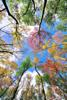
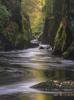
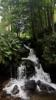
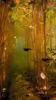
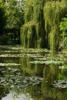
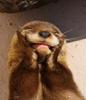
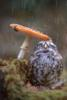
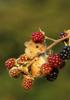
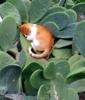
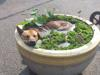
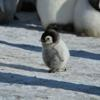
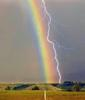
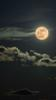
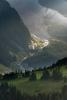
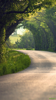
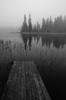

In [7]:
HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

**Завдання 2. Створити функцію, що в якості аргумента приймає:**
- шлях до папки;
- назва вихідного зображення;
- кількість зображень в рядку;
- кількість зображень в стовпчику

і повертає зображення постера.

Вважаємо, що постер є прямокутним і число картинок в постері a х b, де а – число стовпчиків, а b – число рядків.

**Зауваження:**

1) Створити функцію, що перетворює картинку на квадрат з максимально можливим розміром сторони (наприклад, якщо картинка розміром 800х533, то вихідний розмір повинен бути 533х533). Обрізаємо картинку з двох країв, тобто розмір розраховуємо від центру.

2) Всі картинки, з яких створено постер, повинні бути однакового розміру, Тобто після обрізки необхідно змінити розмір, наприклад, на 500х500.

3) Картинки для додавання в постер обирати випадковим чином. Картинки можуть повторюватись.

4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого, пурпурного або голубого кольорів, що також обираються випадковим чином та можуть повторюватись.

5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.

6) Використовувати зображення, що знаходяться в папці, що сформована в завданні 1

7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.

In [12]:
def crop_to_square(img):
    width, height = img.size
    size = min(width, height)
    left = (width - size) / 2
    top = (height - size) / 2
    right = (width + size) / 2
    bottom = (height + size) / 2
    return img.crop((left, top, right, bottom))

def resize_image(img, size):
    return img.resize((size, size), Image.LANCZOS)

def apply_filter(img):
    filters = {
        'red': (255, 0, 0),
        'green': (0, 255, 0),
        'blue': (0, 0, 255),
        'yellow': (255, 255, 0),
        'purple': (128, 0, 128),
        'cyan': (0, 255, 255)
    }
    color = random.choice(list(filters.keys()))
    return Image.blend(img, Image.new('RGB', img.size, filters[color]), 0.5)

def is_image(file_path):
    return imghdr.what(file_path) is not None

def create_poster(folder_path, output_name, rows, columns):
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and is_image(os.path.join(folder_path, f))]
    poster = Image.new('RGB', (500*columns, 500*rows))

    for i in range(rows):
        for j in range(columns):
            img = Image.open(random.choice(images))
            img = crop_to_square(img)
            img = resize_image(img, 500)
            img = apply_filter(img)
            poster.paste(img, (j*500, i*500))
    poster.save(output_name)
    return poster

In [13]:
poster = create_poster(file, 'poster.jpg', 3, 3)
poster

Output hidden; open in https://colab.research.google.com to view.

In [16]:
poster2 = create_poster(file, 'poster2.jpg', 2, 5)
poster2

Output hidden; open in https://colab.research.google.com to view.

In [18]:
poster3 = create_poster(file, 'poster3.jpg', 4, 10)
poster3

ValueError: ignored

**Висновок:**

У ході виконання цієї лабораторної роботи було отримано важливі знання та навики в області обробки цифрових зображень за допомогою бібліотек Pillow та OpenCV. Було виконано роботу з обробки набору зображень, що включала формування набору зображень різних форматів, розмірів та колірних моделей, створення функції для отримання інформації про зображення та створення постера з випадково вибраних зображень.